Este notebook utiliza o **FastText de 50 dimensões** na base de dados do BTG. 

São aplicados os modelos **'Naive Bayes'** (que retorna uma acurácia de 42%) e a **'Regressão Logística'** (que retorna uma acurácia de 43%).

# Setup

In [ ]:
pip install gensim==4.3.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
from gensim.models import KeyedVectors
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from nltk.stem import WordNetLemmatizer

In [237]:
# Download dos recursos necessários do NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [238]:
df_2 = pd.read_csv('/content/drive/MyDrive/base/lematizacao.csv')

In [239]:
df_2 = df_2.rename(columns={'Unnamed: 0': 'id'})
# df_2 = df_2.drop(columns={'tokens'})
df_2

,id,autor,texto,sentimento,tokens
0,0,v8_capital,Confira os resultados dos nossos fundos no mês...,NEUTRAL,"['confira', 'o', 'resultado', 'de o', 'nosso',..."
1,1,winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,"['Alvarez', 'Marsal', 'estara', 'conosco', 'sp..."
2,2,marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,"['repost', 'btg', 'With', 'makerepost', 'enten..."
3,3,lmviapiana,Minuto touro de ouro,POSITIVE,"['minuto', 'touro', 'ouro']"
4,4,vanilson_dos,@ricktolledo Sim,NEUTRAL,"['Ricktolledo', 'sim']"
...,...,...,...,...,...
12188,12350,onixcapital,Uma noite de encontros e muito conhecimento on...,NEUTRAL,"['um', 'noite', 'encontro', 'muito', 'conhecim..."
12189,12351,amgcapitalinvest,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,"['erro', 'financeiro', 'eliminar', 'antes', 'd..."
12190,12352,jayipacderota,Estou muito grato por todo o esforço que você ...,POSITIVE,"['estar', 'muito', 'grato', 'todo', 'esforco',..."
12191,12353,moinho_cultural,"""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL,['dorsodamaocomdedoindicadorapontandoparaadire...


In [8]:
path = '/content/drive/MyDrive/cbow_s50.txt'

In [122]:
model = KeyedVectors.load_word2vec_format(path)

# Preparação e aplicação do modelo

In [240]:
# Acrescenta a coluna de sentimento
df_2['sentimento'] = df_2['sentimento'].map({'NEUTRAL': 0, 'POSITIVE': 1, 'NEGATIVE': -1})

## Definição de funções

In [241]:
# Função para vetorizar um token
def vetorizar_token(token):
    vetor = np.zeros(model.vector_size) # incializa vetor de zeros com a mesma dimensão
    if token in model: # verifica se a palavra está no word2vec treinado
        vetor = model[token] # adiciona o valor do vetor
    return vetor

# Função para vetorizar uma frase
def vetorizar_frase(frase):
    vetores_tokens = [vetorizar_token(token) for token in frase] # verifica cada token da lista
    return np.sum(vetores_tokens, axis=0) # retorna a soma dos vetores

# Aplicar a função 'vetorizar_frase' a todas as frases
# df_2['vetores'] = df_2['tokens_lema'].apply(vetorizar_frase)
df_2['vetores'] = df_2['tokens'].apply(vetorizar_frase)
df_2


,id,autor,texto,sentimento,tokens,vetores
0,0,v8_capital,Confira os resultados dos nossos fundos no mês...,0,"['confira', 'o', 'resultado', 'de o', 'nosso',...","[158.85732152312994, -139.92146873753518, 218...."
1,1,winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,0,"['Alvarez', 'Marsal', 'estara', 'conosco', 'sp...","[89.60119466111064, -63.02571171708405, 106.22..."
2,2,marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,0,"['repost', 'btg', 'With', 'makerepost', 'enten...","[82.99590051546693, -57.03415869921446, 88.839..."
3,3,lmviapiana,Minuto touro de ouro,1,"['minuto', 'touro', 'ouro']","[4.852787021547556, -2.1540859788656235, 3.764..."
4,4,vanilson_dos,@ricktolledo Sim,0,"['Ricktolledo', 'sim']","[4.343551971018314, -1.5418139901012182, 4.685..."
...,...,...,...,...,...,...
12188,12350,onixcapital,Uma noite de encontros e muito conhecimento on...,0,"['um', 'noite', 'encontro', 'muito', 'conhecim...","[56.710637755692005, -47.29410977009684, 71.63..."
12189,12351,amgcapitalinvest,Erros financeiros para eliminar antes dos 30 a...,0,"['erro', 'financeiro', 'eliminar', 'antes', 'd...","[109.16851175948977, -84.39195443503559, 128.5..."
12190,12352,jayipacderota,Estou muito grato por todo o esforço que você ...,1,"['estar', 'muito', 'grato', 'todo', 'esforco',...","[24.957495022565126, -17.664063782431185, 25.9..."
12191,12353,moinho_cultural,"""👉GUADAKAN está chegando!!!! A aula pública e...",0,['dorsodamaocomdedoindicadorapontandoparaadire...,"[224.93965707719326, -161.27884408086538, 245...."


In [242]:
# Acrescenta uma coluna no dataset com a soma dos vetores
df_2['soma_vetores'] = df_2['vetores'].apply(lambda x: np.sum(x, axis=0))
df_2

,id,autor,texto,sentimento,tokens,vetores,soma_vetores
0,0,v8_capital,Confira os resultados dos nossos fundos no mês...,0,"['confira', 'o', 'resultado', 'de o', 'nosso',...","[158.85732152312994, -139.92146873753518, 218....",460.221732
1,1,winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,0,"['Alvarez', 'Marsal', 'estara', 'conosco', 'sp...","[89.60119466111064, -63.02571171708405, 106.22...",310.428597
2,2,marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,0,"['repost', 'btg', 'With', 'makerepost', 'enten...","[82.99590051546693, -57.03415869921446, 88.839...",262.679708
3,3,lmviapiana,Minuto touro de ouro,1,"['minuto', 'touro', 'ouro']","[4.852787021547556, -2.1540859788656235, 3.764...",18.734599
4,4,vanilson_dos,@ricktolledo Sim,0,"['Ricktolledo', 'sim']","[4.343551971018314, -1.5418139901012182, 4.685...",2.979126
...,...,...,...,...,...,...,...
12188,12350,onixcapital,Uma noite de encontros e muito conhecimento on...,0,"['um', 'noite', 'encontro', 'muito', 'conhecim...","[56.710637755692005, -47.29410977009684, 71.63...",168.128231
12189,12351,amgcapitalinvest,Erros financeiros para eliminar antes dos 30 a...,0,"['erro', 'financeiro', 'eliminar', 'antes', 'd...","[109.16851175948977, -84.39195443503559, 128.5...",295.624772
12190,12352,jayipacderota,Estou muito grato por todo o esforço que você ...,1,"['estar', 'muito', 'grato', 'todo', 'esforco',...","[24.957495022565126, -17.664063782431185, 25.9...",70.186435
12191,12353,moinho_cultural,"""👉GUADAKAN está chegando!!!! A aula pública e...",0,['dorsodamaocomdedoindicadorapontandoparaadire...,"[224.93965707719326, -161.27884408086538, 245....",730.390420


# NAIVE BAYES

In [46]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

In [243]:
y = df_2['sentimento']
X = np.hstack(df_2['vetores'].values)

# Convert the list to a NumPy array
X = np.array(X)
y = np.array(y)

# Reshape the input array to have a single feature and multiple samples
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

X = X[:12193]  # Adjust the slicing based on the desired alignment

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes
classifier = GaussianNB()

# Training the classifier
classifier.fit(X_train, y_train)  # Convert X_train to array

# Prediction on the test set
y_pred = classifier.predict(X_test)  # Convert X_test to array

# Validating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 42.93%
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       479
           0       0.43      1.00      0.60      1047
           1       0.00      0.00      0.00       913

    accuracy                           0.43      2439
   macro avg       0.14      0.33      0.20      2439
weighted avg       0.18      0.43      0.26      2439



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precisio

## Gráficos e análises

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


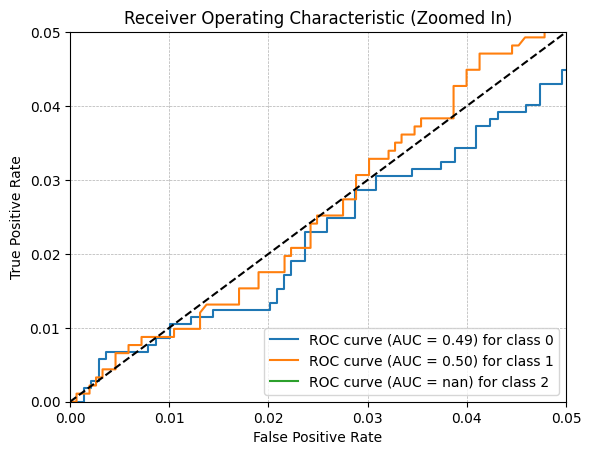

In [244]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Prediction probabilities on the test set
y_pred_prob = classifier.predict_proba(X_test)

# Compute the false positive rate, true positive rate, and threshold for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class with zoom
plt.figure()
for i in range(3):
    plt.plot(fpr[i], tpr[i], label='ROC curve (AUC = {:.2f}) for class {}'.format(roc_auc[i], i))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line

# Set the zoomed-in limits
zoom_xlim = [0.0, 0.05]  # Adjust as desired
zoom_ylim = [0.0, 0.05]  # Adjust as desired
plt.xlim(zoom_xlim)
plt.ylim(zoom_ylim)

# Add gridlines for better visibility
plt.grid(True, linestyle='--', linewidth=0.5)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Zoomed In)')
plt.legend(loc='lower right')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

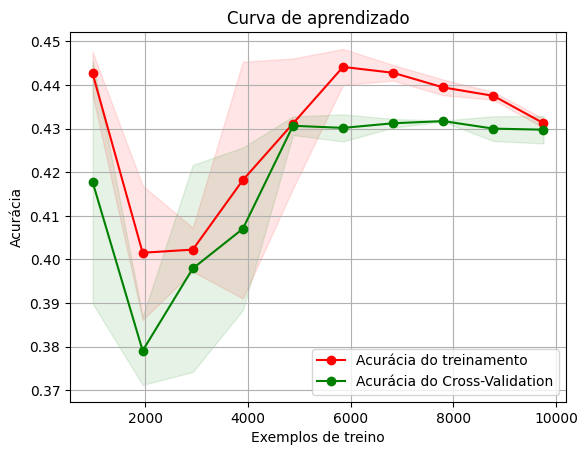

In [245]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define the classifier and parameters

# Compute the learning curve values
train_sizes, train_scores, test_scores = learning_curve(classifier, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the training scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation of the test scores
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.title("Curva de aprendizado")
plt.xlabel("Exemplos de treino")
plt.ylabel("Acurácia")

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Acurácia do treinamento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Acurácia do Cross-Validation")

plt.legend(loc="best")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

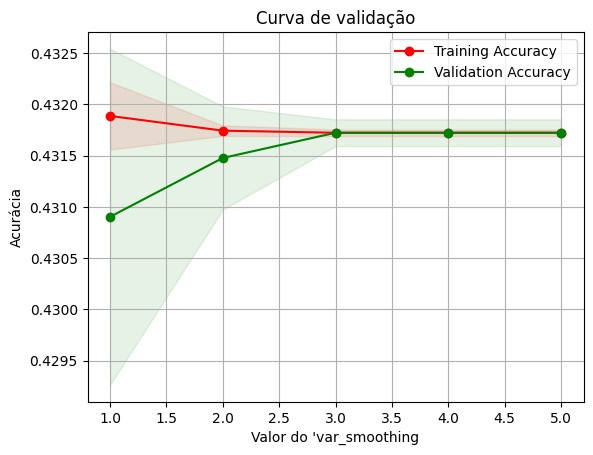

In [246]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve

# Define the classifier and parameter range
param_range = [1, 2, 3, 4, 5]  # Adjust the parameter range as needed

# Compute the validation curve values
train_scores, test_scores = validation_curve(classifier, X, y, param_name='var_smoothing', param_range=param_range, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the training scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation of the test scores
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure()
plt.title("Curva de validação")
plt.xlabel("Valor do 'var_smoothing")
plt.ylabel("Acurácia")

plt.grid()

plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(param_range, train_scores_mean, 'o-', color="r", label="Training Accuracy")
plt.plot(param_range, test_scores_mean, 'o-', color="g", label="Validation Accuracy")

plt.legend(loc="best")
plt.show()


# REGRESSÃO LOGÍSTICA

In [137]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [216]:
y = df_2['sentimento']
X = np.hstack(df_2['vetores'].values)

# Convert the list to a NumPy array
X = np.array(X)
y = np.array(y)

# Reshape the input array to have a single feature and multiple samples
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

X = X[:12193]  # Adjust the slicing based on the desired alignment

# Split the data into training and testing sets
X_trainn, X_test, y_trainn, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the logistic regression model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 42.93%
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       479
           0       0.43      1.00      0.60      1047
           1       0.00      0.00      0.00       913

    accuracy                           0.43      2439
   macro avg       0.14      0.33      0.20      2439
weighted avg       0.18      0.43      0.26      2439



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precisio